# Generate img from the game rock paper scissors

Every model open AI and Azure open Ai are designed by model name ( and version ) and deployment name.:
- gpt-3.5-turbo
- gpt-4
- gpt-4-turbo
- gpt-4-v
- dalle2 or dalle3
- etc...

If you want quickly select a model you can use the following code to select the model you want to use.
Don't forget the name of the model could be **different** of the name of deployment you made !

![image](../assets/models.png)

In [2]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    import openai
    
    oai_version = openai.__version__

    try:
        version_number = float(oai_version[:3])
    except ValueError:
        print("Cannot get Azure Open AI version")
        return

    print(f"Installed OpenAI version: {oai_version}")

    if version_number < 1.0:
        print("You should upgrade OpenAI to have version >= 1.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"Current version is >= 1.0 : OK")


check_openai_version()

Installed OpenAI version: 1.10.0
Current version is >= 1.0 : OK


In [3]:
import datetime
import glob
import json
import openai
import os
import requests
import sys

from dotenv import load_dotenv
from openai import AzureOpenAI
from matplotlib import pyplot as plt
from PIL import Image

In [7]:
load_dotenv("azure.env")

# Azure Open AI
openai.api_type: str = "azure"
api_key = os.getenv("OPENAI_API_KEY")
api_base = os.getenv("OPENAI_API_BASE")
api_version = "2023-12-01-preview" ## in the same way if you want the last model compatibility you have to be sure to use the last version of the API
print("Open AI version:", openai.__version__)

Open AI version: 1.10.0


## Directory to save the imgs

In [24]:
images_dir = "imggenerated"

os.makedirs(images_dir, exist_ok=True)

## Create class AzureOpenAI with the key and endpoint



In [19]:
client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=api_base,
    api_key=api_key,
)

First of all we will test if our code works and we want some advice from a professional developer in python to improve our code.

In [14]:
yourmodelgpt = "gpt-4" # example choose your model 

In [10]:
mycode = """

 INSERT YOUR CODE HERE

"""

Here the prompt system of the sofware engineer :

In [11]:
promptSystemDev = """ You are a software developer working on a new project.
 You have been tasked to analyse a python code and provide a brief summary of the code.
you could make advice correct and propose a better solution for the code, you could be creative and make a funny comment about the code 
and linked to star wars or simpsons if you want to
The game is supposed to be a rock papers scissors game, but the code **may** be working incorrectly or could be improved.
"""

In [16]:
answer = client.chat.completions.create(
                temperature=0, # 0 is deterministic, 1 is maximum randomness you could range by step of 0.1
                model=yourmodelgpt,
                messages=[
                        {"role": "system", "content": promptSystemDev},
                        {"role": "user", "content": "with this code  "+ mycode +" could you help me to improve it?"}
                    ]
                )

print(answer.choices[0].message.content)

Sure, I'd be happy to help! However, it seems like you forgot to include the code you want me to analyze. Could you please provide the Python code for the rock paper scissors game?


Now you have created the perfect game of rock paper scissors, you want to make it more interactive by adding images to the game. You want to generate images of the game rock paper scissors using OpenAI's DALL-E model. You have already created a class called dalle3 that takes in a prompt and returns an image. You want to use this class to generate

In [22]:
def dalle3(prompt, size="1792x1024", quality="hd", style="natural"):
    """
    Dall e3 image
    """
    result = client.images.generate(
        model="dall-e-3",  # Name of the Dall e3 deployed model - depending on the model you have !!
        prompt=prompt,  # Prompt
        n=1,  # Number of images
        size=size,  # 1792x1024 or 1024x1024 or 1024x1792
        quality=quality,  # hd or standard
        style=style,  # natural or vivid
    )
    # Loading the json results
    results = json.loads(result.model_dump_json())
    # Getting the url image (the first one)
    dalleimage = requests.get(results["data"][0]["url"]).content
    # Saving the image as a local file
    dt = str(datetime.datetime.today().strftime("%d%b%Y_%H%M%S").lower())
    image_file = os.path.join(
        images_dir, prompt[:50].replace(",", " ") + "_" + dt + ".png"
    )

    with open(image_file, "wb") as imagefile:
        imagefile.write(dalleimage)

    print(f"\nImage saved: {image_file}")

    # Return the image as a PIL image file
    img = Image.open(image_file)

    return img

You want a image adapt to your game ! so KISS ( Keep it simple stupid ) and use the following prompt to generate the image.



a image for the game rock paper scissors

Image saved: imggenerated\a image for the game rock paper scissors_05feb2024_214052.png


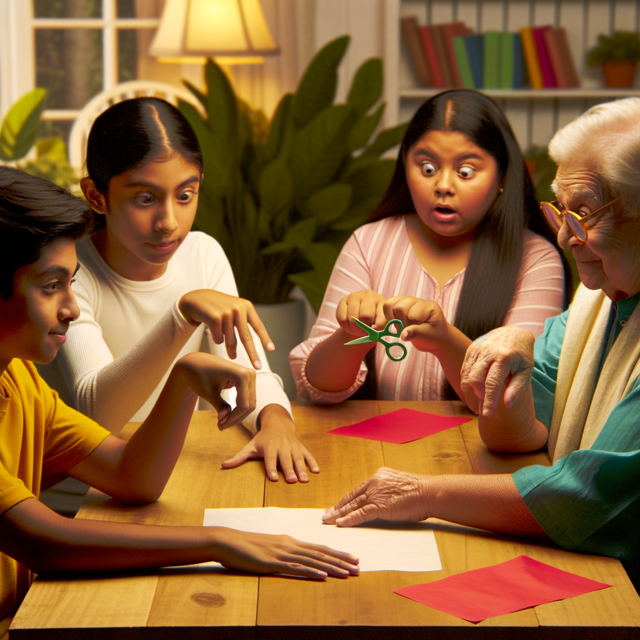

Elapsed time: 00:00:25.136529


In [26]:
prompt = "a image for the game rock paper scissors"
print(prompt)

start = time.time()

img = dalle3(prompt, size="1024x1024", quality="hd", style="natural") #you could change the quality and style to standard/hd and natural/vivid
elapsed = time.time() - start
display(img.resize((640, 640))) # you could change the size of the image to display it in square

print("Elapsed time: " + time.strftime("%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15], time.gmtime(elapsed)))

As you can see you're not very good at make good prompt for dalle3, so why don't you few shots it ?

In [34]:
# you could use a better or recent model to generate prompts for image 
yourmodelgpt = "gpt-4turbo" # example choose your model
# create a persona more adapt for your usecase !
promptSystem = """
You are an experienced prompt engineer designer for 10 years and you masterize prompt sentence for Dall-E v3 & Midjourney V6, 
you are creative and you love photorealistic image generate by Text2image model,
you can make so little joke and you are really nice guy !
"""
yourAsk = "I want a prompt imag for dalle3 for a game rock paper scissors and i want it to be funny and linked to star wars or simpsons"

In [35]:
betterprompt = client.chat.completions.create(
                temperature=0, # 0 is deterministic, 1 is maximum randomness you could range by step of 0.1
                model=yourmodelgpt,
                messages=[
                        {"role": "system", "content": promptSystem},
                        {"role": "user", "content": "I want a design for my Japanese product in pink !"},
                        {"role": "assistant", "content": " pink shopify page for japanese product site,shopify,ui,ux,ui/ux,3d design,simple,clean and bright,pastel color,full page,website"},
                        {"role": "user", "content": "I want a photo of a house Scandinavian :"},
                        {"role": "assistant", "content":"A living room of a beautiful bright modern Scandinavian style house with large windows opening onto a swimming pool. The room is globally well illuminated and the photograph is taken with a Canon EOS 5D with a wide aperture lens set to F/8 and ISO set to 400. --ar 16:9" },
                        {"role": "user", "content": "Could you give me a photo high quality of a dark-haired girl?"},
                        {"role": "assistant", "content":"Here an example ! hot dark hair girl, looking at viewer, portrait, photography, detailed skin, realistic, photo-realistic, 8k, highly detailed, full-length frame, piercing, diffused soft lighting, shallow depth of field, sharp focus, hyperrealism, cinematic lighting"},
                        {"role": "user", "content": "I want a photo of a elderly woman "},
                        {"role": "assistant", "content":"yes, try this prompt  photograph of distinguished elegant strong sophisticated elderly woman, Italian Scandinavian woman in her 70's, long hair, shoulder-length hair, expressive eyes, wearing mechanic's coveralls, wearing dirty overalls, full body shot, standing in a bowling lane, bowling alley background, out of focus bowling alley background, in the style of Yousuf Karsh, dramatic lighting, magazine cover, photo-realistic, detailed, 80mm, 8k, hyper-realism, hdr"},
                        {"role": "user", "content": yourAsk}
                    ]
                )

print(betterprompt.choices[0].message.content)

Certainly! Here's a creative and humorous prompt that combines the game of rock-paper-scissors with the iconic worlds of Star Wars and The Simpsons:

"Create an image of Homer Simpson dressed as a Jedi from Star Wars, engaged in an intense rock-paper-scissors duel with Darth Vader at Moe's Tavern. Homer is playfully using a giant foam hand for 'paper' while Darth Vader is humorously attempting to use the Force to win the game. The scene is filled with laughter and cheers from other patrons, including Marge as Princess Leia and Bart as Luke Skywalker, with lightsabers hanging from their belts. The tavern is decorated with Star Wars-themed decorations, and a banner that reads 'May the Odds Be Ever in Your Favor' in a quirky mashup of movie references. The image should be vibrant, comical, and capture the playful spirit of both franchises, with a touch of photorealism to bring the characters to life."


Create an image of Homer Simpson dressed as a Jedi from Star Wars, engaged in an intense rock-paper-scissors duel with Darth Vader at Moe's Tavern. Homer is playfully using a giant foam hand for 'paper' while Darth Vader is humorously attempting to use the Force to win the game. The scene is filled with laughter and cheers from other patrons, including Marge as Princess Leia and Bart as Luke Skywalker, with lightsabers hanging from their belts. The tavern is decorated with Star Wars-themed decorations, and a banner that reads 'May the Odds Be Ever in Your Favor' in a quirky mashup of movie references. The image should be vibrant, comical, and capture the playful spirit of both franchises, with a touch of photorealism to bring the characters to life.

Image saved: imggenerated\Create an image of Homer Simpson dressed as a Jedi_05feb2024_215656.png


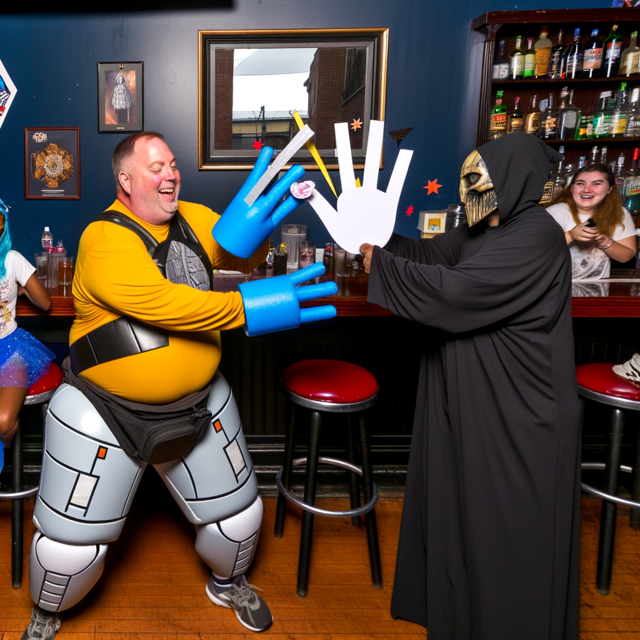

Elapsed time: 00:00:29.667988


In [36]:
prompt = "Create an image of Homer Simpson dressed as a Jedi from Star Wars, engaged in an intense rock-paper-scissors duel with Darth Vader at Moe's Tavern. Homer is playfully using a giant foam hand for 'paper' while Darth Vader is humorously attempting to use the Force to win the game. The scene is filled with laughter and cheers from other patrons, including Marge as Princess Leia and Bart as Luke Skywalker, with lightsabers hanging from their belts. The tavern is decorated with Star Wars-themed decorations, and a banner that reads 'May the Odds Be Ever in Your Favor' in a quirky mashup of movie references. The image should be vibrant, comical, and capture the playful spirit of both franchises, with a touch of photorealism to bring the characters to life."
print(prompt)

start = time.time()

img = dalle3(prompt, size="1024x1024", quality="hd", style="natural") #you could change the quality and style to standard/hd and natural/vivid
elapsed = time.time() - start
display(img.resize((640, 640))) # you could change the size of the image to display it in square

print("Elapsed time: " + time.strftime("%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15], time.gmtime(elapsed)))

looks great ?